In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import scipy as sp
import os, sys,glob, copy
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

from sklearn.linear_model import LinearRegression
from scipy.stats import linregress, pearsonr, spearmanr

In [2]:
[driver_ttf, driven_ttf] = np.load('~/data/Fig5_6/ttf_area.npy')

$r_S$ = 0.83; $P_S$ = 0.0415626822
$r_P$ = 0.93; $P_P$ = 0.0080889857
$r_S$ = 0.14; $P_S$ = 0.7871720117
$r_P$ = 0.08; $P_P$ = 0.8775453616


Text(0.5, 1.0, 'Pearson r=0.96, p=0.003; r=-0.01, p=0.99; Spearman r=0.83 p=0.04; r=0.14, p=0.79')

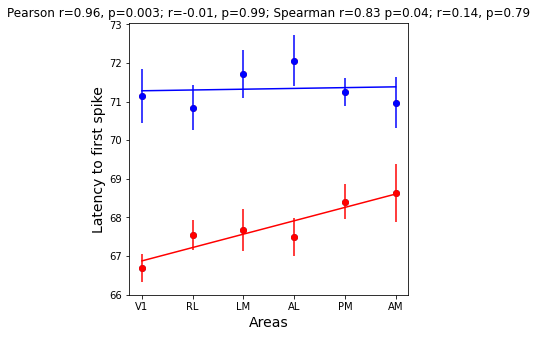

In [3]:
HS = np.array([-0.50149, -0.13929, -0.12294, -0.00431, 0.11828, 0.29330]) # CC-CT-TC global HS from Harris

plt.figure(figsize=(5,5))
Y = driver_ttf[:,0].reshape(-1, 1)
X = np.arange(6).reshape(-1, 1) #HS.reshape(-1, 1) #
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
r_s,p_s = spearmanr(X,Y)
r_p,p_p = pearsonr(X[:,0],Y[:,0])

text = '$r_S$ = ' + str(np.around(pow(r_s,1),2)) + '; $P_S$ = ' + str(np.around(p_s,10)) + '\n' + \
          '$r_P$ = ' + str(np.around(pow(r_p,1),2)) + '; $P_P$ = ' + str(np.around(p_p,10))
print(text)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.errorbar(x=X, y=driver_ttf[:,0], yerr=driver_ttf[:,1], c='r', fmt='o')

Y = driven_ttf[:,0].reshape(-1, 1)
X = np.arange(6).reshape(-1, 1) #HS.reshape(-1, 1) #
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
r_s,p_s = spearmanr(X,Y)
r_p,p_p = pearsonr(X[:,0],Y[:,0])

text = '$r_S$ = ' + str(np.around(pow(r_s,1),2)) + '; $P_S$ = ' + str(np.around(p_s,10)) + '\n' + \
          '$r_P$ = ' + str(np.around(pow(r_p,1),2)) + '; $P_P$ = ' + str(np.around(p_p,10))
print(text)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='b')
plt.errorbar(x=X, y=driven_ttf[:,0], yerr=driven_ttf[:,1], c='b', fmt='o')
#plt.ylim([66,73])
plt.ylabel('Latency to first spike', fontsize=14)
plt.xlabel('Areas', fontsize=14)
plt.xticks(X, ['V1', 'RL', 'LM', 'AL', 'PM', 'AM'])
plt.title('Pearson r=0.96, p=0.003; r=-0.01, p=0.99; Spearman r=0.83 p=0.04; r=0.14, p=0.79')


